## Ridge and Lasso Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("Assignment 2 Advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

In [4]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Hyperparameter:
alpha: Controls the strength of regularisation 
- Higher alpha - High regularisaton
- Lower alpha - Low regularisaton

In [6]:
alpha_values = np.logspace(-3, 3, 10)
# 10 values from 0.001 to 1000 (10^-3 to 10^3)
print(alpha_values)

[1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01 4.64158883e+01
 2.15443469e+02 1.00000000e+03]


In [7]:
alpha_values = {'alpha': np.logspace(-3, 3, 10)}

#### Ridge Regression

In [8]:
ridge = Ridge()

In [ ]:
ridge_cv = GridSearchCV(ridge, alpha_values, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [10]:
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

In [11]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Best Ridge Alpha: {ridge_cv.best_params_['alpha']}")
print(f"Ridge Regression RMSE: {rmse_ridge:.2f}")

Best Ridge Alpha: 0.001
Ridge Regression RMSE: 1.78


#### Lasso Regression

In [12]:
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, alpha_values, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [13]:
best_lasso = lasso_cv.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

In [14]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Best Lasso Alpha: {lasso_cv.best_params_['alpha']}")
print(f"Lasso Regression RMSE: {rmse_lasso:.2f}")

Best Lasso Alpha: 2.154434690031882
Lasso Regression RMSE: 1.77


In [15]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

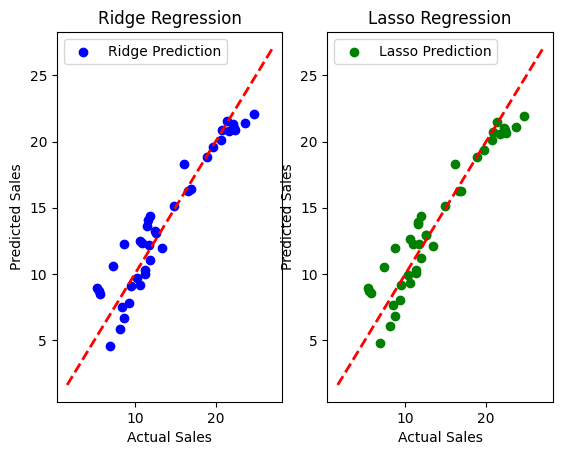

In [16]:
# Ridge Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, color='blue', label="Ridge Prediction")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel("Predicted Sales")
plt.title("Ridge Regression")
plt.legend()

# Lasso Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='green', label="Lasso Prediction")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel("Predicted Sales")
plt.title("Lasso Regression")
plt.legend()

plt.show()

In [17]:
# Ridge Coeffient
for feature_name, coef in zip(X.columns, best_ridge.coef_):
    print(f"Featues: {feature_name}, Coeffient: {coef}")

Featues: TV, Coeffient: 0.044729517481338306
Featues: Radio, Coeffient: 0.18919504786574776
Featues: Newspaper, Coeffient: 0.0027611160976652995


In [18]:
# Lasso Coeffient
for feature_name, coef in zip(X.columns, best_lasso.coef_):
    print(f"Featues: {feature_name}, Coeffient: {coef}")

Featues: TV, Coeffient: 0.044516937884577404
Featues: Radio, Coeffient: 0.18084149925032336
Featues: Newspaper, Coeffient: 0.0


In [19]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # 50% L1, 50% L2
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [20]:
# Predictions
y_pred_elastic = elastic_net.predict(X_test)

In [ ]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
print(f"ElasticNet Alpha: {elastic_net.alpha}")
print("ElasticNet Regression RMSE:", rmse)

Best ElasticNet Alpha: 0.1
ElasticNet Regression RMSE: 1.7810894764961034


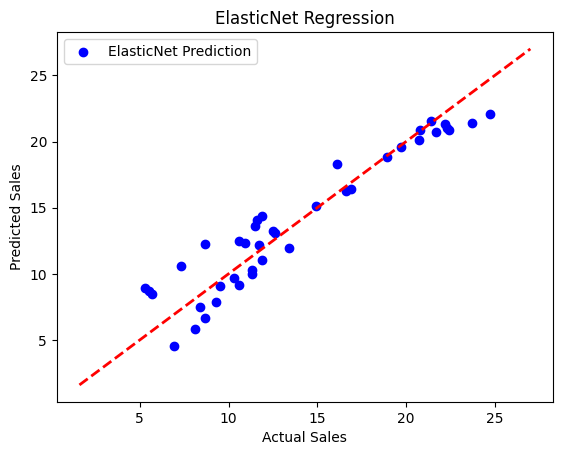

In [22]:
plt.scatter(y_test, y_pred_elastic, color='blue', label="ElasticNet Prediction")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel("Predicted Sales")
plt.title("ElasticNet Regression")
plt.legend()

In [23]:
# ElasticNet Coeffient
for feature_name, coef in zip(X.columns, elastic_net.coef_):
    print(f"Featues: {feature_name}, Coeffient: {coef}")

Featues: TV, Coeffient: 0.04472464318175472
Featues: Radio, Coeffient: 0.1889525462100257
Featues: Newspaper, Coeffient: 0.0027080267082268666
